### 4-1. 인구현황 데이터 분석

In [12]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

data = pd.read_csv('data/인구현황.csv')
print(data.shape)
print(type(data))

(18, 8)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# 광역시도 이름을 인자로 받아서 인구수와 면적을 그려주는 함수
def show_pop_area(sido_name):
    # 입력받은 광역시도에 해당하는 DataFrame 객체생성
    sido_df = data.loc[data['광역시도'] == sido_name]
    # Figure와 Axes 객체 생성
    figure, (axes1,axes2) = plt.subplots(nrows=2, ncols=1)
    # Figure size 확대
    figure.set_size_inches(18,12)

    pop_plot = sns.barplot(x='행정기관', y='인구수', data=sido_df.sort_values(by='인구수',ascending=False), ax=axes1,hue='행정구역')
    pop_plot.set_title(f'{sido_name} 행정구역별 인구수')
    area_plot = sns.barplot(x='행정기관', y='면적', data=sido_df.sort_values(by='면적',ascending=False), ax=axes2,hue='행정구역')
    area_plot.set_title(f'{sido_name} 행정구역별 면적')
    
    plt.show()

# 표를 만들어주는 함수
def table(query):
    test = test

c:\Users\hyon\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hyon\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hyon\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hyon\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hyon\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **

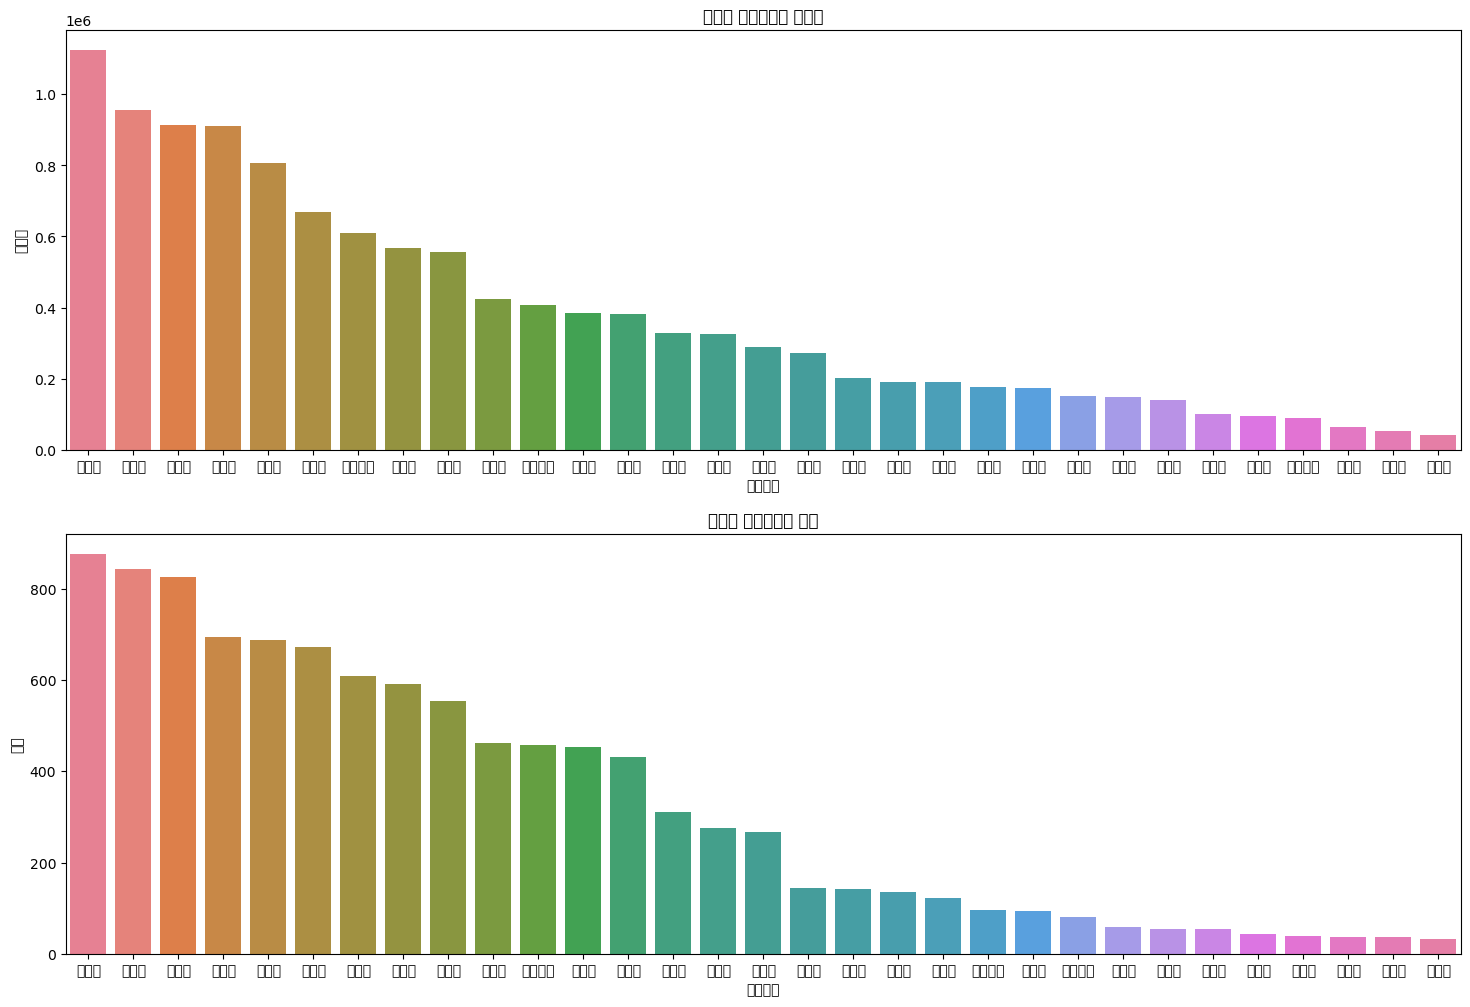

In [10]:
show_pop_area('경기도')